<a href="https://colab.research.google.com/github/AryanGoyal123/Machine-learning-Projects/blob/main/Tensorflow_classificaiton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cancer_classification.csv to cancer_classification.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['cancer_classification.csv']))
# Dataset is now stored in a Pandas Dataframe

In [ ]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [ ]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


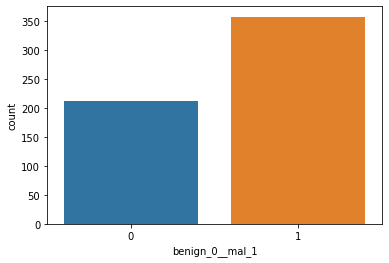

In [ ]:
sns.countplot(x = 'benign_0__mal_1', data = df)

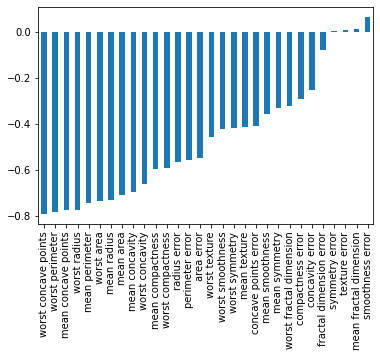

In [ ]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind = 'bar')

In [ ]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [ ]:
X_train.shape

(426, 30)

In [ ]:
model = Sequential()

model.add(Dense(30, activation = 'relu'))
model.add(Dense(15, activation = 'relu'))

model.add(Dense(1, activation = 'sigmoid')) #binary classification

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [ ]:
model.fit(x = X_train, y = y_train, epochs = 600, validation_data=(X_test, y_test))

Epoch 1/600
14/14 [==============================] - 1s 15ms/step - loss: 0.6764 - val_loss: 0.6636
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6437 - val_loss: 0.6292
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6124 - val_loss: 0.5982
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5776 - val_loss: 0.5637
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5419 - val_loss: 0.5226
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5014 - val_loss: 0.4805
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4585 - val_loss: 0.4352
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4149 - val_loss: 0.3906
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3726 - val_loss: 0.3481
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3357 - val_loss: 0.3124
Epoch 11

KeyboardInterrupt: ignored

In [ ]:
losses = pd.DataFrame(model.history.history)

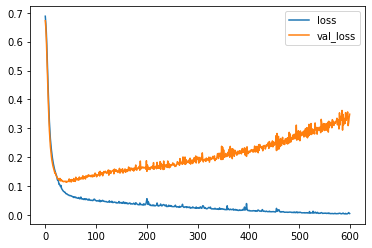

In [ ]:
losses.plot()

In [ ]:
#we see a lot of overfitting because of validation loss increasing drastically after 70 epochs, over fitting to the data set
#we can use early stopping in order to check  when to stop training


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
model = Sequential()

model.add(Dense(30, activation = 'relu'))
model.add(Dense(15, activation = 'relu'))

model.add(Dense(1, activation = 'sigmoid')) #binary classification

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode ='min', verbose = 1, patience = 25)

In [ ]:
model.fit(x = X_train, y = y_train, epochs = 600, validation_data=(X_test, y_test),
          callbacks = [early_stop])

Epoch 1/600
14/14 [==============================] - 1s 12ms/step - loss: 0.6756 - val_loss: 0.6517
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6282 - val_loss: 0.6130
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5835 - val_loss: 0.5645
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5363 - val_loss: 0.5175
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4907 - val_loss: 0.4710
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4455 - val_loss: 0.4240
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4008 - val_loss: 0.3728
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3543 - val_loss: 0.3281
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3154 - val_loss: 0.2911
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.2823 - val_loss: 0.2585
Epoch 11

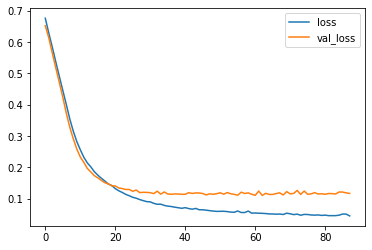

In [ ]:
model.loss = pd.DataFrame(model.history.history)
model.loss.plot()

In [ ]:
from tensorflow.keras.layers import Dropout

In [ ]:
# drop put layers -- turn off neurons randomly in order to prevent over fitting

model = Sequential()

model.add(Dense(30, activation = 'relu'))
model.add(Dropout(0.5))
#half neuron during each batch of data would be turned off
model.add(Dense(15, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation = 'sigmoid')) #binary classification

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode ='min', verbose = 1, patience = 25)

In [ ]:
model.fit(x = X_train, y = y_train, epochs = 600, validation_data=(X_test, y_test),
          callbacks = [early_stop])

Epoch 1/600
14/14 [==============================] - 1s 13ms/step - loss: 0.6930 - val_loss: 0.6809
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6706 - val_loss: 0.6648
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6651 - val_loss: 0.6462
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6536 - val_loss: 0.6302
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6401 - val_loss: 0.6149
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6243 - val_loss: 0.6002
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6047 - val_loss: 0.5845
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5917 - val_loss: 0.5708
Epoch 9/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5889 - val_loss: 0.5559
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5670 - val_loss: 0.5332
Epoch 11

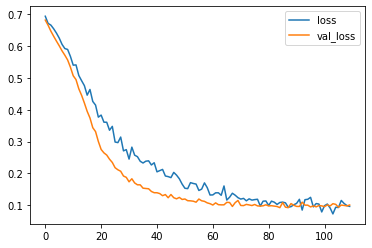

In [ ]:
model.loss = pd.DataFrame(model.history.history)
model.loss.plot()

In [ ]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96        55
           1       0.99      0.95      0.97        88

    accuracy                           0.97       143
   macro avg       0.96      0.97      0.96       143
weighted avg       0.97      0.97      0.97       143



In [ ]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 4 84]]
